This notebook use mcvine.phonon.powderSQE.IDF.from_data_dir.
The calculation produces pretty good result. However, it seems that we may need more points at qx and qy directions, or we should use a random sampling of the Q space (MC).

In [1]:
import numpy as np, os, glob

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt

In [3]:
%matplotlib notebook

In [4]:
import histogram.hdf as hh, histogram as H
from multiphonon import sqe as mpsqe

/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
workdir = '_tmp.model-coherent-SQE-IDF-graphite-08082019'
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/dv/mcvine/phonon/examples/_tmp.model-coherent-SQE-IDF-graphite-08082019


# Force constants

In [6]:
!rm -rf inputs
!mkdir inputs

In [7]:
!cp ../../tests/data/graphite/POSCAR inputs/
!cp ../../tests/data/graphite/SPOSCAR inputs/
!cp ../../tests/data/graphite/FORCE_CONSTANTS inputs/

In [8]:
datadir = os.path.abspath('inputs')

In [9]:
ls {datadir}

FORCE_CONSTANTS  POSCAR  SPOSCAR


## From SPOSCAR and POSCAR we can know supercell grid

In [10]:
!head -n 10 {datadir}/SPOSCAR

C
   1.0
    14.7636000000000000    0.0000000000000000    0.0000000000000000
    -7.3818000000000000   12.7856526540000000    0.0000000000000000
     0.0000000000000000    0.0000000000000000    6.7050000000000000
 144
Direct
  0.0000000000000000  0.0000000000000000  0.2500000000000000
  0.1666666666666667  0.0000000000000000  0.2500000000000000
  0.3333333333333333  0.0000000000000000  0.2500000000000000


In [11]:
cat {datadir}/POSCAR

graphite
1.0
   2.4606000000000000    0.0000000000000000    0.0000000000000000
  -1.2303000000000000    2.1309421090000000    0.0000000000000000
   0.0000000000000004    0.0000000000000007    6.7050000000000000
C
4
Direct
   0.0000000000000000    0.0000000000000000    0.0000000000000000    !C
   0.0000000000000000    0.0000000000000000    0.5000000000000000    !C
   0.3333333333333333    0.6666666666666667    0.0000000000000000    !C
   0.6666666666666667    0.3333333333333333    0.5000000000000000    !C


# Compute phonon data from force constants

In [6]:
from mcvine.phonon.from_phonopy import idf
reload(idf)

<module 'mcvine.phonon.from_phonopy.idf' from '/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/mcvine/phonon/from_phonopy/idf.pyc'>

In [13]:
%%time
from mcvine.phonon.from_phonopy import make_all
!mkdir -p phonon
%cd phonon
!cp {datadir}/* .

make_all(
    qgrid_dims=[51,51,51],
    fix_pols_phase=True,
    force_constants='FORCE_CONSTANTS', poscar='POSCAR', sposcar='SPOSCAR'
)
%cd -

/SNS/users/lj7/dv/mcvine/phonon/examples/_tmp.model-coherent-SQE-IDF-graphite-08082019/phonon
* Constructing Q array
* Calling phonopy to compute eigen values and eigen vectors
* Discarding negative freqencies
* Fixing polarizations
* Writing out freqencies
* Writing out polarizations
200.68839170184168
/SNS/users/lj7/dv/mcvine/phonon/examples/_tmp.model-coherent-SQE-IDF-graphite-08082019
CPU times: user 4min 21s, sys: 6min 41s, total: 11min 3s
Wall time: 1min 5s


# DOS histogram

In [6]:
ls -tl phonon/DOS

-rw-r--r-- 1 lj7 users 2776 Aug 18 13:15 phonon/DOS


In [10]:
from mccomponents.sample import phonon as mcphonon

In [11]:
doshist = mcphonon.read_dos.dos_fromidf('phonon/DOS').doshist

DOS: fit first 43 points to parbolic


<IPython.core.display.Javascript object>


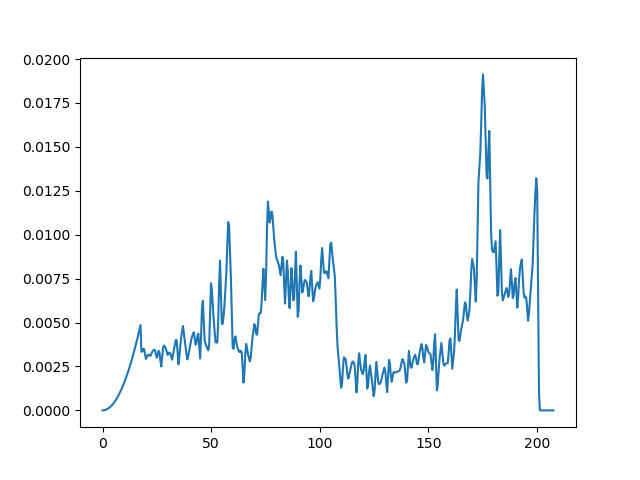

In [12]:
plt.figure()
plt.plot(doshist.energy, doshist.I)

# SQE calc.

In [7]:
import mcvine.phonon.powderSQE.IDF as psidf
reload(psidf)

<module 'mcvine.phonon.powderSQE.IDF' from '/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/mcvine/phonon/powderSQE/IDF.pyc'>

In [8]:
%%time
disp = psidf.disp_from_datadir('./phonon')

DOS: fit first 43 points to parbolic
CPU times: user 4.73 s, sys: 2.02 s, total: 6.75 s
Wall time: 6.78 s


# Ei=30

In [13]:
%%time
IQEhist_Ei_30_T_300 = psidf.from_data_dir(
    datadir='./phonon/',
    disp=disp, 
    N = int(2e6),
    Q_bins=np.arange(0, 4, 0.04), E_bins=np.arange(0,30,.2),
    doshist=doshist,
    T=300., Ei=30., max_det_angle=60.,
    include_multiphonon=False,
)

100%|██████████| 12/12 [00:27<00:00,  2.17s/it]
/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/histogram/ndarray/NumpyNdArray.py:149: RuntimeWarning: invalid value encountered in divide
  if isNdArray( other ): self._numarr /= other.asNumarray()
/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/histogram/ndarray/NumpyNdArray.py:124: RuntimeWarning: divide by zero encountered in divide
  r._numarr = other/self._numarr
/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/histogram/ndarray/NumpyNdArray.py:142: RuntimeWarning: invalid value encountered in multiply
  if isNdArray( other ): self._numarr *= other.asNumarray()
/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/histogram/ndarray/NumpyNdArray.py:149: RuntimeWarning: divide by zero encountered in divide
  if isNdArray( other ): self._numarr /= other.asNumarray()


CPU times: user 1min 12s, sys: 12.7 s, total: 1min 25s
Wall time: 1min 25s


In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


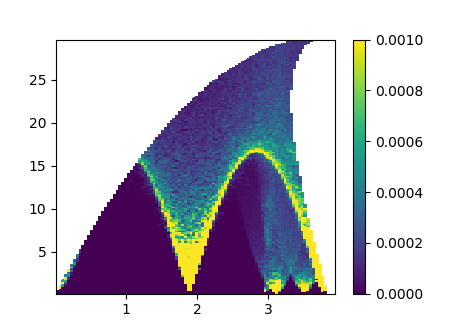

In [20]:
plt.figure(figsize=(4.5,3.3))
mpsqe.plot(IQEhist_Ei_30_T_300)
plt.clim(0, .001)

# Ei=55

In [21]:
%%time
IQEhist_Ei_55_T_300 = psidf.from_data_dir(
    datadir='./phonon/',
    disp=disp, 
    N = int(1e6),
    Q_bins = np.arange(0, 5, 0.05), E_bins = np.arange(0, 55, .5),
    doshist=doshist,
    T=300., Ei=55., max_det_angle=60.,
    include_multiphonon=False,
)

100%|██████████| 12/12 [00:14<00:00,  1.11s/it]


CPU times: user 37.9 s, sys: 7.16 s, total: 45.1 s
Wall time: 45 s


<IPython.core.display.Javascript object>


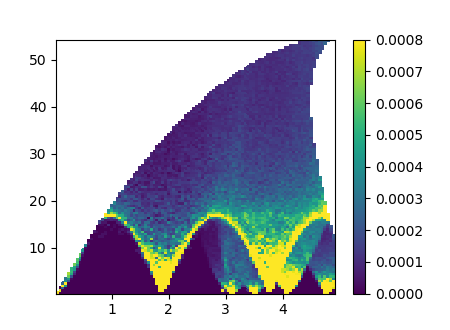

In [26]:
plt.figure(figsize=(4.5,3.3))
mpsqe.plot(IQEhist_Ei_55_T_300)
plt.clim(0, .0008)
# H.plot(IQEhist_Ei_55_T_300, min=0, max=1e-1, cmap='jet')

# Ei=125

In [27]:
%%time
IQEhist_Ei_125_T_300 = psidf.from_data_dir(
    datadir='./phonon/',
    disp=disp, 
    N = int(1e6),
    Q_bins = np.arange(0, 7.5, 0.05), E_bins = np.arange(0, 120, 1.),
    doshist=doshist,
    T=300., Ei=125., max_det_angle=60.,
    include_multiphonon=False,
)

100%|██████████| 12/12 [00:12<00:00,  1.11it/s]


CPU times: user 38.2 s, sys: 4.19 s, total: 42.4 s
Wall time: 42.2 s


<IPython.core.display.Javascript object>


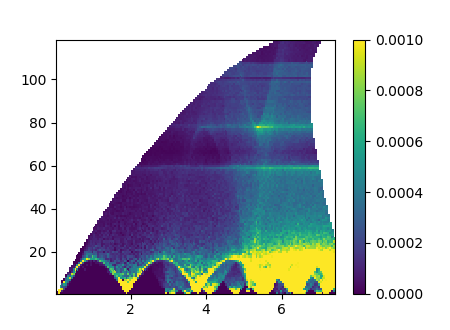

In [30]:
plt.figure(figsize=(4.5,3.3))
mpsqe.plot(IQEhist_Ei_125_T_300)
plt.clim(0, .001)
# H.plot(IQEhist_Ei_125_T_300, min=0, max=.05, cmap='jet')

# Ei=300

In [34]:
reload(psidf)

<module 'mcvine.phonon.powderSQE.IDF' from '/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/mcvine/phonon/powderSQE/IDF.py'>

In [38]:
%%time
IQEhist_Ei_300_T_300, mph_IQE_Ei_300_T_300 = psidf.from_data_dir(
    datadir='./phonon/',
    disp=disp, 
    N = int(1e6),
    Q_bins = np.arange(0, 23, 0.1), E_bins = np.arange(0, 250, 1),
    doshist=doshist,
    T=300., Ei=300., 
    include_multiphonon=True,
)

100%|██████████| 12/12 [00:14<00:00,  1.38s/it]


CPU times: user 49.7 s, sys: 17.9 s, total: 1min 7s
Wall time: 54 s


<IPython.core.display.Javascript object>


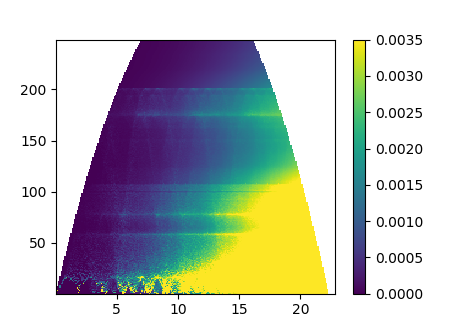

In [39]:
plt.figure(figsize=(4.5,3.3))
mpsqe.plot(IQEhist_Ei_300_T_300 + mph_IQE_Ei_300_T_300)
plt.clim(0, .0035)
# H.plot(IQEhist_Ei_300_T_300, min=0, max=.05, cmap='jet')

## Exp data

In [40]:
expiqe = hh.load("../../tests/data/graphite/expiqe_300meV.h5")

/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


<IPython.core.display.Javascript object>


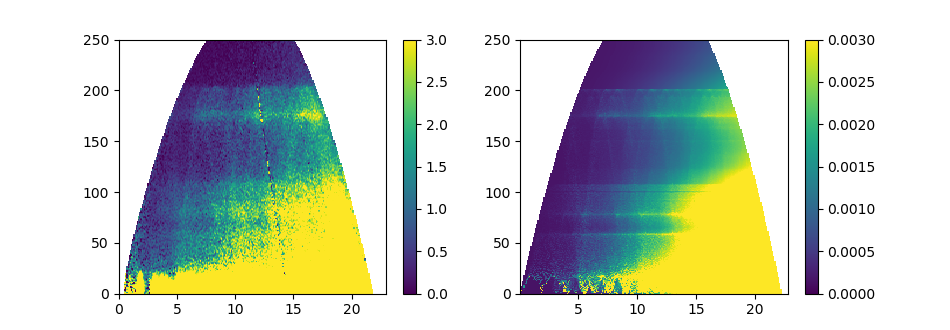

(0, 250)

In [41]:
plt.figure(figsize=(9.5,3.3))
plt.subplot(1,2,1)
mpsqe.plot(expiqe)
plt.ylim(0, None)
plt.clim(0, 3)
plt.ylim(0, 250)
plt.subplot(1,2,2)
mpsqe.plot(IQEhist_Ei_300_T_300 + mph_IQE_Ei_300_T_300 + (0.00015,0))
plt.clim(0, .003)
plt.ylim(0, 250)